# News feed tag cloud

In [1]:
library(readr)
library(dplyr)
library(stringr)
library(wordcloud)
library(tidytext)




Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: RColorBrewer


In [2]:
library(tidyRSS)

I'm using a Portuguese list. If you want to analyze english feeds, just change next cell to:
```
data("stop_words")
```

In [10]:
stopwords <- read_csv('portuguese-stopwords.txt', col_names = 'word')


Parsed with column specification:
cols(
  word = col_character()
)


Change the urls for your favorite news feed providers...

In [11]:
feed <- tidyfeed("https://<feed1>")
feed2 <- tidyfeed("https://<feed2>")
feed3 <- tidyfeed("https://<feed3")
feed4 <- tidyfeed("https://<feed4>")

In [12]:
feedall <- bind_rows(feed,feed2,feed3,feed4)


If you want to analyze english feeds, change the following cell to:
```
rss_t <- feedall %>%
    unnest_tokens(word,item_title) %>%
    anti_join(stop_words,by="word") 

```


In [13]:
rss_t <- feedall %>%
    unnest_tokens(word,item_title) %>%
    anti_join(stopwords,by="word") 


In [14]:
words = rss_t %>% 
    group_by(word) %>% 
    summarise(freq = n()) %>% 
    arrange(desc(freq)) 

words = as.data.frame(words)

rownames(words) = words$word


In [15]:
library(wordcloud)

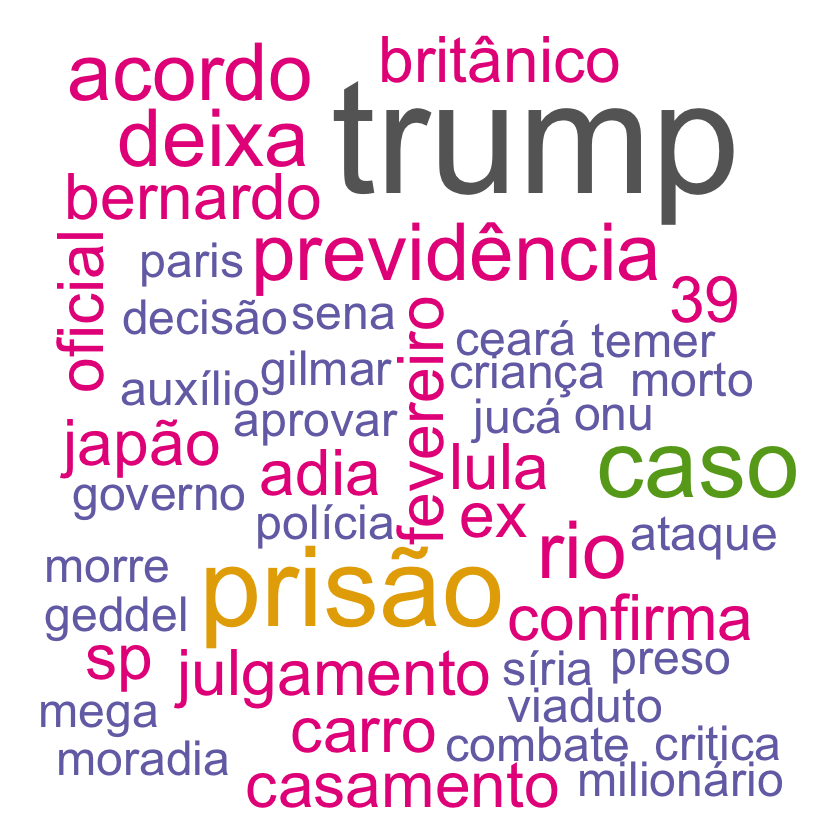

In [16]:
options(warn=-1)
wordcloud(words$word,words$freq,scale=c(8,.02),min.freq=3,max.words=Inf,colors=brewer.pal(8,"Dark2"))
options(warn=0)
